<a href="https://colab.research.google.com/github/poring3995/Assignment-week-7/blob/main/FP_growth_exercise_using_Apache_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
data = pd.read_excel('/content/gdrive/My Drive/DDDD.xlsx')
data.head()

,SalesDate,SalesValue,SalesAmount,Customer,SalesTransactionID,SalesItem
0,2018-09-28,8280.0,10,0,0,0
1,2018-09-28,7452.0,10,0,0,0
2,2019-04-23,21114.0,30,0,1,0
3,2019-04-23,7038.0,10,0,1,1
4,2019-04-23,7000.0,2,0,1,2


In [ ]:
df1 = data[['Customer','SalesTransactionID','SalesItem']]
df1.head()

,Customer,SalesTransactionID,SalesItem
0,0,0,0
1,0,0,0
2,0,1,0
3,0,1,1
4,0,1,2


In [ ]:

df=df1.groupby ('SalesTransactionID') ['SalesItem']. apply (lambda x: x.reset_index (drop = True)). unstack (). reset_index ()
df.drop('SalesTransactionID',axis=1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,436,437,438,439,440,441,442,443,444,445
0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
items = (df[0].unique())
items

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 9.060e+02, 1.536e+03,
       3.750e+03])

In [ ]:
encoded_vals = []
def custom():
    for index, row in df.iterrows():
        labels = {}
        uncommons = list(set(items) - set(row))
        commons = list(set(items).intersection(row))
        for uc in uncommons:
            labels[uc] = 0
        for com in commons:
            labels[com] = 1
        encoded_vals.append(labels)
custom()
ohe_df = pd.DataFrame(encoded_vals)
print(ohe_df)
     

       1.0     2.0     3.0     4.0     5.0     6.0     7.0     8.0     9.0     \
0           0       0       0       0       0       0       0       0       0   
1           1       1       0       0       0       0       0       0       0   
2           1       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
48421       0       0       0       0       0       0       0       0       0   
48422       0       0       0       0       0       0       0       0       0   
48423       0       0       0       0       0       0       0       0       0   
48424       0       0       0       0       0       0       0       0       0   
48425       0       0       0       0       0       0       0       0       0   

       10.0    ...  3736.0 

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
freq_items = apriori(ohe_df, min_support=0.006, use_colnames=True) #, verbose=1 #min_support=0.006, 
freq_items

,support,itemsets
0,0.006732,(6.0)
1,0.021270,(7.0)
2,0.024326,(8.0)
3,0.021600,(9.0)
4,0.018812,(13.0)
...,...,...
1044,0.006174,"(312.0, 98.0, 104.0, 103.0)"
1045,0.007228,"(312.0, 98.0, 108.0, 103.0)"
1046,0.006422,"(312.0, 108.0, 98.0, 104.0)"
1047,0.006463,"(104.0, 108.0, 110.0, 103.0)"


In [ ]:
freq_items.to_excel('Export&Supportvalues.xlsx')

In [ ]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.006)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(8.0),(7.0),0.024326,0.021270,0.008095,0.332767,15.645237,0.007577,1.466850
1,(7.0),(8.0),0.021270,0.024326,0.008095,0.380583,15.645237,0.007577,1.575148
2,(20.0),(7.0),0.058584,0.021270,0.007062,0.120550,5.667717,0.005816,1.112889
3,(7.0),(20.0),0.021270,0.058584,0.007062,0.332039,5.667717,0.005816,1.409387
4,(83.0),(7.0),0.040784,0.021270,0.006422,0.157468,7.403459,0.005555,1.161654
...,...,...,...,...,...,...,...,...,...
2569,"(104.0, 103.0)","(312.0, 108.0)",0.018275,0.012597,0.006257,0.342373,27.179917,0.006027,1.501464
2570,(312.0),"(104.0, 108.0, 103.0)",0.021951,0.010346,0.006257,0.285042,27.551816,0.006030,1.384214
2571,(108.0),"(312.0, 104.0, 103.0)",0.034176,0.007124,0.006257,0.183082,25.698285,0.006013,1.215392
2572,(104.0),"(312.0, 108.0, 103.0)",0.049911,0.009107,0.006257,0.125362,13.765944,0.005802,1.132918


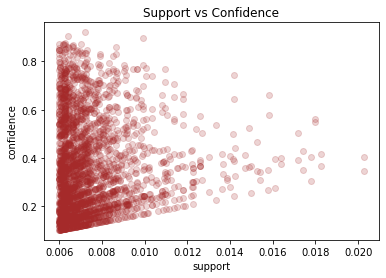

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.2,color='brown')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

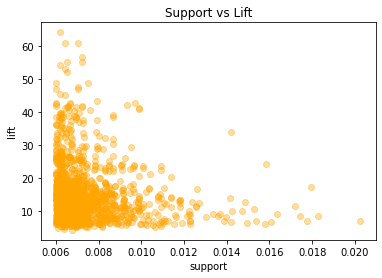

In [ ]:
plt.scatter(rules['support'], rules['lift'], alpha=0.2,color='orange')
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

In [ ]:

%%capture
!sudo apt-get update --fix-missing

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName('fpgrowth') \
    .getOrCreate()

spark   

In [ ]:
from google.colab import files
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas


sparkdata = spark.createDataFrame(data)
basketdata = sparkdata.dropDuplicates(['SalesTransactionID', 'SalesItem']).sort('SalesTransactionID')
basketdata = basketdata.groupBy("SalesTransactionID").agg(F.collect_list("SalesItem")).sort('SalesTransactionID')
     

In [ ]:

#Frequent Pattern Growth – FP Growth is a method of mining frequent itemsets
fpGrowth = FPGrowth(itemsCol="collect_list(SalesItem)", minSupport=0.006, minConfidence=0.006) 
model = fpGrowth.fit(basketdata)

# Display frequent itemsets.
model.freqItemsets.show()
items = model.freqItemsets
# Display generated association rules.
model.associationRules.show()
rules = model.associationRules
# transform examines the input items against all the association rules and summarize the
# consequents as prediction
model.transform(basketdata).show()
transformed = model.transform(basketdata)

+-------------------+----+
|              items|freq|
+-------------------+----+
|              [257]| 432|
|               [20]|2837|
|              [104]|2417|
|          [104, 20]| 981|
|             [1491]| 432|
|              [110]|2172|
|         [110, 104]| 745|
|     [110, 104, 20]| 476|
|          [110, 20]| 765|
|             [1495]| 431|
|              [103]|2123|
|         [103, 110]| 671|
|    [103, 110, 104]| 445|
|[103, 110, 104, 20]| 348|
|     [103, 110, 20]| 444|
|         [103, 104]| 885|
|     [103, 104, 20]| 572|
|          [103, 20]| 861|
|              [179]| 431|
|               [67]|1975|
+-------------------+----+
only showing top 20 rows

+------------+----------+-------------------+------------------+
|  antecedent|consequent|         confidence|              lift|
+------------+----------+-------------------+------------------+
|       [128]|      [67]| 0.3379978471474704|  8.28753607390552|
|       [128]|      [91]|0.34230355220667386|10.666918802548512|
|

In [ ]:
# Convert the Spark DataFrame back to a Pandas DataFrame using Arrow
result_pdf = items.select("*").toPandas()
result_pdf.head()

,items,freq
0,[257],432
1,[20],2837
2,[104],2417
3,"[104, 20]",981
4,[1491],432


In [ ]:
result_pdf.to_excel('result_pdfItemsFreq.xlsx')

In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

,antecedent,consequent,confidence,lift
0,[128],[67],0.337998,8.287536
1,[128],[91],0.342304,10.666919
2,[128],[104],0.387513,7.764057
3,[128],[92],0.315393,9.648273
4,[128],[103],0.355221,8.102645


In [ ]:
rules_pdf.to_excel('rules_pdfAnteConseConfLift.xlsx')

In [ ]:
transformed_pdf = transformed.select("*").toPandas()
transformed_pdf.head()

,SalesTransactionID,collect_list(SalesItem),prediction
0,0,[0],[]
1,1,"[0, 1, 2]",[]
2,2,[1],[]
3,3,[0],[]
4,4,[0],[]


In [ ]:
transformed_pdf.to_excel('transformed_pdfSalesTransactionIDCollectListPred.xlsx')